# Publishing with Python - Creating figures with data visualization libraries

## Setting up the Notebook

The first thing we'll do is import all the libraries and packages we need to function!

Be sure that all of these libraries and packages are installed in the python environment in which you're working. If you are accessing this notebook via binder, those environments will be pre-constructed for you. :)

In [1]:
import os   # Uncomment and use this library if you pull the .ipynb file onto your local machine

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # This is a West Wing reference apparently, but some import it as sb

import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
# This notebook has a few cells that point to external data (e.g. the airbnb .csv's)
# If you are using the link directly from the workshop to launch a binder, use the first line below
# If you have downloaded the .ipynb file and the data and are working locally, use the second line

os.chdir('\\data')
# os.chdir('C:\\Users\\fritzdi\\DataScience\\data\\pypub')  # add your own directory path to your data here!

os.getcwd()

'C:\\Users\\fritzdi\\DataScience\\notebooks'

## Diving into Data Visualization

### Working with Matplotlib

<Figure size 432x288 with 0 Axes>

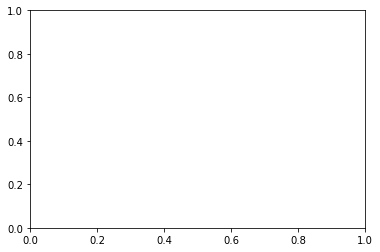

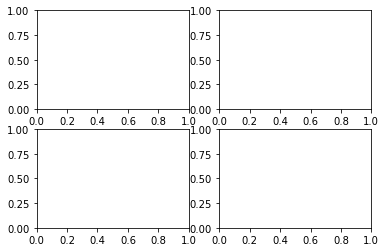

In [4]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

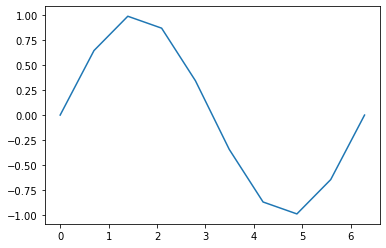

In [6]:
# You can easily plot equations

x = np.linspace(0, 2 * np.pi, 10) # arguments are start, stop and number of samples
y = np.sin(x)

fig, ax = plt.subplots() # Create a figure containing a single axes (area to display the data)
ax.plot(x, y)
plt.show()

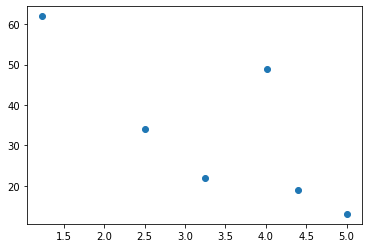

In [7]:
# Quick versions of various plots are possible

cost = [2.50, 1.23, 4.02, 3.25, 5.00, 4.40]
sales_per_day = [34, 62, 49, 22, 13, 19]

plt.scatter(cost, sales_per_day)
# plt.plot(cost, sales_per_day, "o")   # This line creates the same plot more efficiently, but loses the flexibility of the plt.scatter function
plt.show()

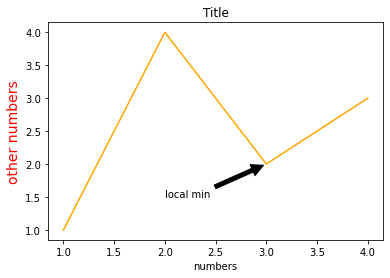

In [8]:
# You can add labels and annotations
# Control details of the "Artists"
# Basically everything visible on a figure is an Artist that can be controlled with "setters" when a method is called

fig, ax = plt.subplots()
ax.set_title('Title')
ax.set_xlabel('numbers')
ax.set_ylabel('other numbers', fontsize=14, color='red')  # you can pass keyword arguments to text functions
ax.annotate('local min', xy=(3, 2), xytext=(2, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.plot([1, 2, 3, 4], [1, 4, 2, 3], color='orange'); # Plot some data on the axes and pick a color for the line.

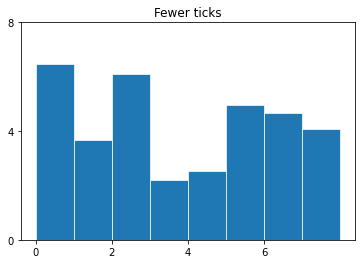

In [12]:
# Create some data pulling randomly from a uniform distribution:

np.random.seed(6)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

# Play with the two different sets of axix controls below:

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

ax.set_xticks(np.arange(0, 8, 2)) # high value not included
ax.set_yticks([0, 4, 8])  # note that we don't need to specify labels
ax.set_title('Fewer ticks');

plt.show()

We've been looking at creating figures with simple numbers, equations and randomly generated numbers, but what if we want to load in our own data?

We want to turn to other python packages to be able to load in data. This is where NumPy and Pandas come in.

### NumPy

NumPy arrays are powerful for working with data.

In [13]:
# Here we'll import a simple spreadsheet containing two columns of integers

data = np.genfromtxt('SomeNumbers.csv',
                 dtype = int, delimiter = ',',
                 skip_header=1)
print(data)

[[ 1  4]
 [ 2  6]
 [ 3  2]
 [ 4  7]
 [ 5  3]
 [ 6  9]
 [ 7  1]
 [ 8  3]
 [ 9  5]
 [10  8]]


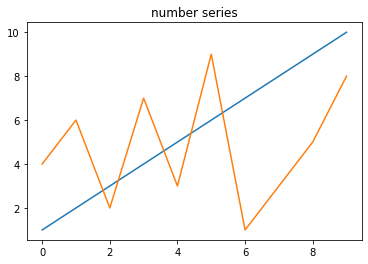

In [14]:
fig, ax = plt.subplots()  # Create a figure containing a single axes (area to display the data)
ax.set_title('number series')
ax.plot(data);  # Plot some data on the axes.

In [15]:
airb1, airb2 = np.genfromtxt('AirbnbDenver_Sample.csv',   # This data is a trimmed version of the full summary listings from Inside Airbnb
                 dtype = int,
                 delimiter = ',',
                 unpack = True,   # This puts values separated into airb1 and airb2 (2 1D arrays)
                 skip_header=1,   # lets numpy know the first row is field labels
                 usecols = (9,11))  # These columns are price and number_of_reviews - always look at your source data!

print(airb1, airb2)

[ 79 133 179  55  52  33 100  85 110  90  67 400  46  75 165] [ 96 167  87 642 165 256  77 105 627 227  11  28 126  11   2]


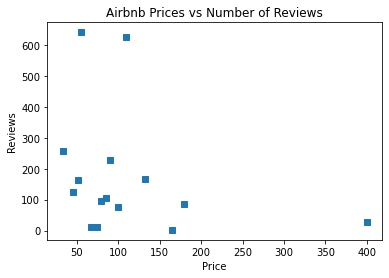

In [17]:
fig, ax = plt.subplots()
# ax.plot(airb1, airb2, 'o')   # You can change the marker style to be a circle
# ax.plot(airb1, airb2, 'd')   # ... a diamond
# ax.plot(airb1, airb2, 'v')   # ... a downward triangle
ax.plot(airb1, airb2, 's')   # ... or a square
ax.set_title('Airbnb Prices vs Number of Reviews')
ax.set_xlabel('Price')
ax.set_ylabel('Reviews')
plt.show()

In [18]:
# Without unpacking, the data is read in as one 2D array, "airb"

airb = np.genfromtxt('AirbnbDenver_Sample.csv',
                 dtype = int,
                 delimiter = ',',
                 skip_header=1,   
                 usecols = (9,11))  # These columns are price and number_of_reviews
print(airb)

[[ 79  96]
 [133 167]
 [179  87]
 [ 55 642]
 [ 52 165]
 [ 33 256]
 [100  77]
 [ 85 105]
 [110 627]
 [ 90 227]
 [ 67  11]
 [400  28]
 [ 46 126]
 [ 75  11]
 [165   2]]


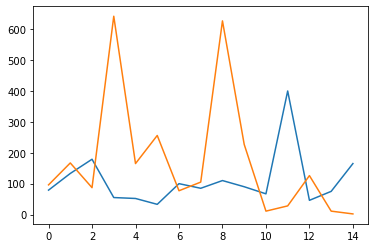

In [19]:
# The default plot is of the values in the array
# The following two sets of code create the same graph

# fig, ax = plt.subplots()
# ax.plot(airb);

plt.plot(airb)
plt.show()

### Pandas

Instead of NumPy and working with arrays, you can use Pandas to create visualizations as it is built on top of matplotlib.

Pandas is a package that gives us the capability of putting all of our data into a **dataframe**. It's like pulling a spreadsheet into python! 

We'll look at Pandas more closely in a moment, but here's a quick look at what it can do.

In [20]:
# Here we're using Pandas (pd) to read in our data and read the column headers

airbnbData = pd.read_csv("AirBnB-Denver_20211229_listingssummary.csv")   # This is the full Denver dataset from Inside Airbnb

airbnbData.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

<AxesSubplot:xlabel='neighbourhood'>

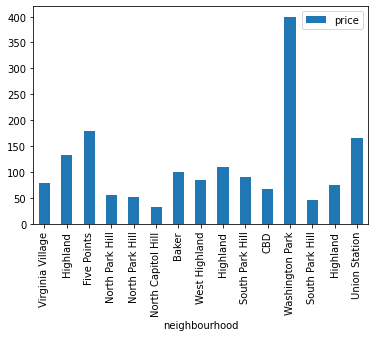

In [21]:
# We'll create a bar chart with Pandas making use of matplotlib.
# The dataset is quite large, so we can limit it to the first 15 entries in our graphic.

airbnbData.head(15).plot.bar(x="neighbourhood", y ="price")

### Seaborn

Seaborn is a data visualization library that is also built on matplotlib and uses pandas.

This library comes with datasets built in. We can easily access one of these called *penguins* to see the graphics Seaborn can quickly create...

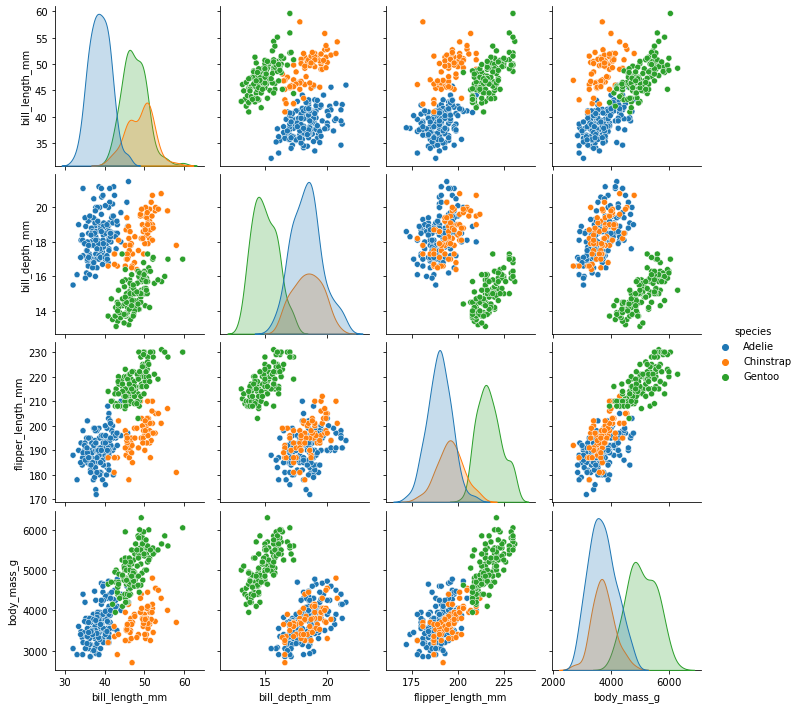

In [22]:
# The followng simple load command is applicable to the built-in datasets

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

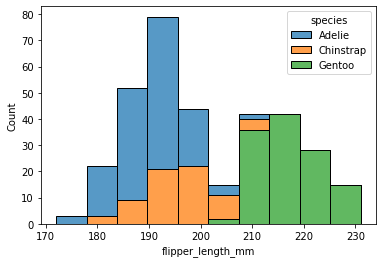

In [23]:
# Here is another style of plot Seaborn can make with one line of code after the data is loaded

df = sns.load_dataset("penguins")
sns.histplot(data=df, x="flipper_length_mm", hue="species", multiple="stack")

Seaborn is dependent on matplotlib, numpy, scipy and pandas. These libraries will be installed when you install seaborn if you don't have them already.

Seaborn's functioning is tightly integrated with the pandas dataframe.

In [24]:
# If we want to use our own dataset, we'll initially work with our .csv in pandas
# We'll create a dataframe called "airb" for the truncated dataset
# and one called "airbnbData" for the full dataset

airb = pd.read_csv("AirbnbDenver_Sample.csv")
airb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,177,Tiny Home in the Heart of the City- ECO FRIENDLY,615,Joe,NaN,Virginia Village,39.69551,-104.92489,Entire home/apt,79,1,96,44515,1.48,2,329,19,2016-BFN-0004968
1,360,Sit in the Peaceful Garden of the Chickadee Co...,666,Jennifer & Giovanni,NaN,Highland,39.76758,-105.00316,Entire home/apt,133,30,167,44499,4.05,2,88,34,2017-BFN-0002177
2,364,Lodo / RiNo LOFT via airport train,783,Jason,NaN,Five Points,39.76672,-104.97906,Entire home/apt,179,185,87,42486,0.57,1,362,0,NaN


In [25]:
# Let's get a summary of our column headers

list(airb.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

In [26]:
airbnbData = pd.read_csv("AirBnB-Denver_20211229_listingssummary.csv")

In [ ]:
# The columns for the full dataset are the same if you want to inspect them:

# list(airbnbData.columns)

Seaborn has a number of built in themes that let you independently control the style and scaling of the plot to quickly translate your work between presentation contexts.

In [ ]:
# Leave the following default theme off for your first go through the next commands,
# then come back and re-run them with this theme on to see how the plot changes.

# sns.set_theme()

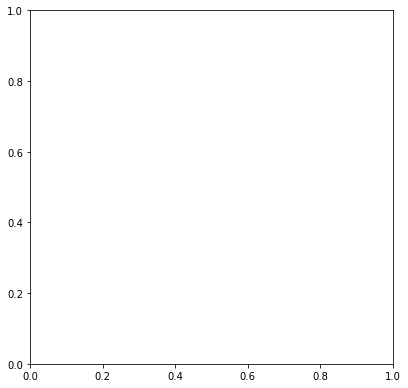

In [27]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

Remember, we are interested in creating figures to insert into reports, papers, etc. We can We can save the figure with the `matplotlib.plot.savefig()`function (remember, we pulled this in as plt!). You can choose to save a .jpg or an .svg!

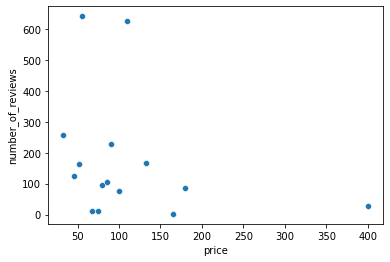

In [28]:
sns.scatterplot(x="price", y="number_of_reviews",
                data=airb)
plt.savefig('DenverAirbnbSubset-pricetoreviews.svg')

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

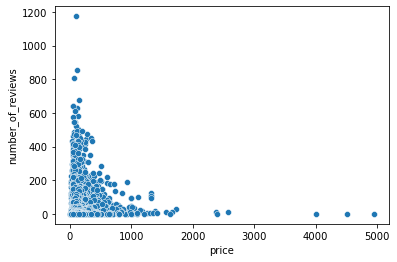

In [29]:
sns.scatterplot(x="price", y="number_of_reviews",
                data=airbnbData)

### Maps! - Introducing GeoPandas

Let's look at the geopandas library for creating geographic visualizations.

The Pandas package has been extended to GeoPandas. This package, like it sounds, makes it possible to have geospatial data in our dataframes. It can:

- Create a geo-enabled point data column off of lat/lon information
- Directly load geospatial vector files such as shapefiles and GeoJSONs

In [30]:
# Now, we'll use geopandas to geo-enable our .csv since it has lat & lon data!

gdf = gpd.GeoDataFrame(
    airbnbData, geometry=gpd.points_from_xy(airbnbData.longitude, airbnbData.latitude))

In [46]:
# We've added a geometry column at the end:

list(gdf.columns)

airbnbData.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,177,Tiny Home in the Heart of the City- ECO FRIENDLY,615,Joe,NaN,Virginia Village,39.69551,-104.92489,Entire home/apt,79,1,96,2021-11-15,1.48,2,329,19,2016-BFN-0004968,POINT (-104.92489 39.69551)
1,360,Sit in the Peaceful Garden of the Chickadee Co...,666,Jennifer & Giovanni,NaN,Highland,39.76758,-105.00316,Entire home/apt,133,30,167,2021-10-30,4.05,2,88,34,2017-BFN-0002177,POINT (-105.00316 39.76758)
2,364,Lodo / RiNo LOFT via airport train,783,Jason,NaN,Five Points,39.76672,-104.97906,Entire home/apt,179,185,87,2016-04-26,0.57,1,362,0,NaN,POINT (-104.97906 39.76672)


<AxesSubplot:>

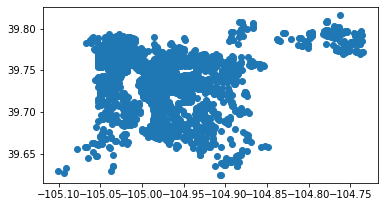

In [34]:
# The .plot() method in geopandas is based on matplotlib
# there is an argument "kind" where the default is "geo" so it auto-magically makes a map

gdf.plot()

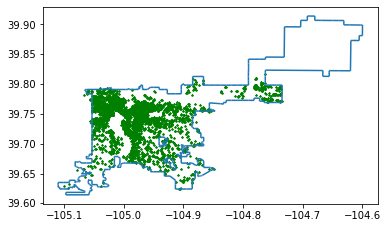

In [35]:
# Let's created a map plot with a base reference layer
# And yes, geopandas can directly read shapefiles!

denver = gpd.read_file("county_boundary_lines.shp")

base = denver.plot()
gdf.plot(ax=base, marker='*',color='green',markersize=3)
plt.show()

#### Adding a basemap

We can also add a basemap in geopandas, but we'll need a new package for this called contextily.

Contextily retrieves web map tiles from several sources like OpenStreetMap and Stamen.

In [36]:
import geopandas as gpd
import contextily as cx

For this section, we'll use a dataset that is built into the GeoPandas library called *naturalearth_cities* which really aren't ALL the cities.

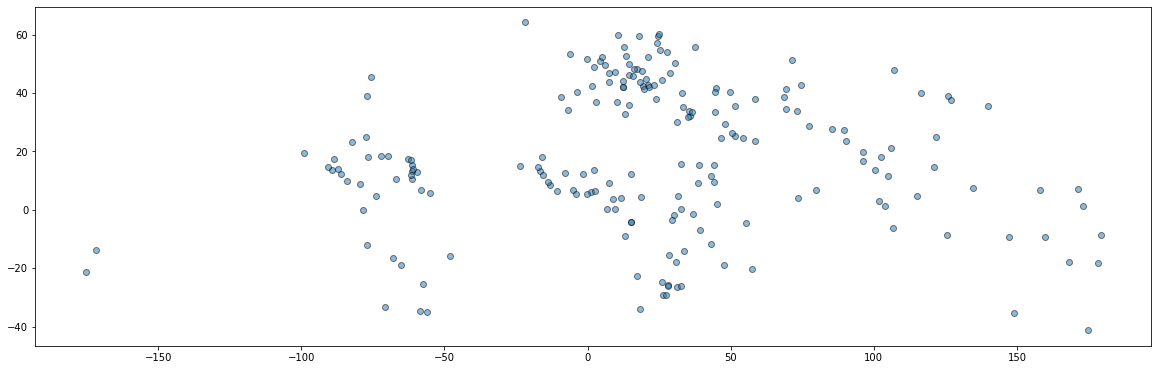

In [40]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')   # alpha controls symbol transparency

In [41]:
# Checking our coordinate reference system (they are important!):
# Before adding web map tiles to this plot, we first need to ensure the coordinate reference systems (CRS) of the tiles and the data match. Web map tiles are typically provided in Web Mercator (EPSG 3857), so let us first check what CRS our NYC boroughs are in:

gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
gdf_wm = gdf.to_crs(epsg=3857)
gdf_wm.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

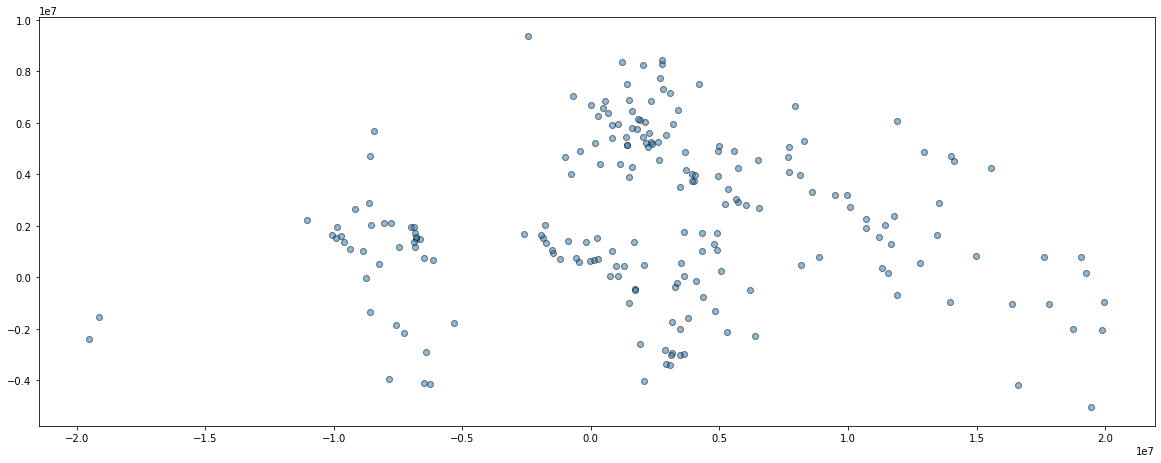

In [43]:
ax = gdf_wm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')

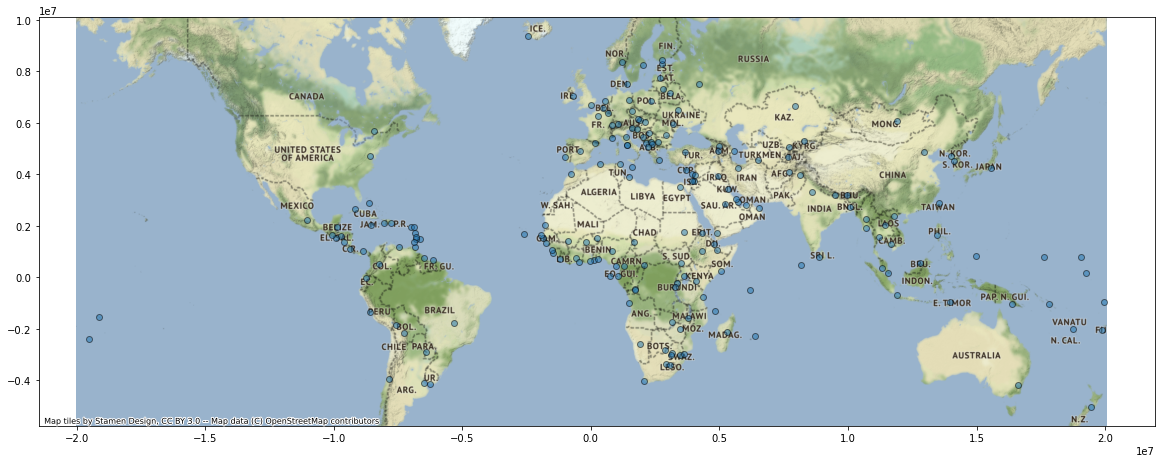

In [44]:
ax = gdf_wm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

By default, contextily uses the Stamen Terrain style. We can specify a different style using cx.providers:

You'll notice that the axis labels are no longer lat and lon, but numbers associated with the web tiles, but we can turn these off.

And again, our goal is to create a figure to insert into a publication! We can save the figure with the `matplotlib.plot.savefig()` function (remember, we pulled this in as plt!).

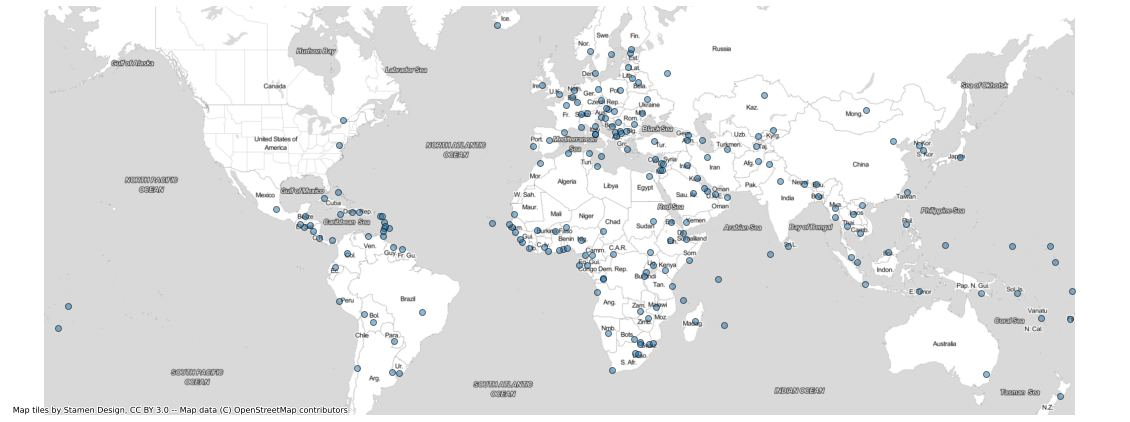

In [45]:
ax = gdf_wm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.savefig('naturalearthcities.jpg')

So now you have some tools to explore and create a number of static data visualizations you can export to figures.

Go back to the documentation guides for the libraries and packages above, and start building some of your own Jupyter Notebooks out of Anaconda Navigator (be sure to have all the right libraries added to your python environment!) and HAVE FUN creating useful figures for your research!